In [4]:
import pandas as pd

In [35]:
df = pd.read_csv("titanic.csv")
idx = df["Age"].unique()
age_null_true = df["Age"][idx]


In [43]:
age_is_null  = pd.isnull(df["Age"])
age_not_null = df["Age"][age_is_null == False]
correct_mean_age = age_not_null.mean()

In [48]:
df[["Fare"]][df["Pclass"] == 1].head()

,Fare
1,71.2833
3,53.1000
6,51.8625
11,26.5500
23,35.5000


In [52]:
passenger_classes = [1,2,3]
fares_by_class = {}
for pc in passenger_classes:
    rows = df["Fare"][df["Pclass"] == pc]
    fares_by_class[pc] = rows.mean()
    
passenger_age = df.pivot_table(index="Pclass", values="Age")
passenger_age

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [53]:
fares_by_class

{1: 84.15468749999992, 2: 20.66218315217391, 3: 13.675550101832997}

数据透视表

In [67]:
import numpy as np
port_stats= df.pivot_table(index="Embarked",values=["Fare","Survived"],aggfunc=np.sum)  
port_stats

,Fare,Survived
Embarked,,
C,10072.2962,93
Q,1022.2543,30
S,17439.3988,217


In [69]:
drop_na_rows = df.dropna(axis=0)
drop_na_columns = df.dropna(axis=1)

new_titanic_survival = df.dropna(axis=0, how="any", subset=["Age", "Sex"])
new_titanic_survival

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [78]:
first_five_rows = new_titanic_survival.iloc[:5]
first_ten_rows = new_titanic_survival.iloc[:10]
row_index_25 = new_titanic_survival.loc[25]
row_position_fifth = new_titanic_survival.iloc[4]
row_position_fifth

PassengerId                           5
Survived                              0
Pclass                                3
Name           Allen, Mr. William Henry
Sex                                male
Age                                  35
SibSp                                 0
Parch                                 0
Ticket                           373450
Fare                               8.05
Cabin                               NaN
Embarked                              S
Name: 4, dtype: object

In [80]:
titanic_reindexed = new_titanic_survival.reset_index(drop=True)
titanic_reindexed.iloc[:5, :3]

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


In [111]:
def age_info(data):
    if data["Age"] < 18:
        return "minor"
    elif data["Age"] >=18:
        return "adult"
    else:
        return "unknown"
age_labels = df.apply(age_info, axis=1)
age_labels

0        adult
1        adult
2        adult
3        adult
4        adult
5      unknown
6        adult
7        minor
8        adult
9        minor
10       minor
11       adult
12       adult
13       adult
14       minor
15       adult
16       minor
17     unknown
18       adult
19     unknown
20       adult
21       adult
22       minor
23       adult
24       minor
25       adult
26     unknown
27       adult
28     unknown
29     unknown
        ...   
861      adult
862      adult
863    unknown
864      adult
865      adult
866      adult
867      adult
868    unknown
869      minor
870      adult
871      adult
872      adult
873      adult
874      adult
875      minor
876      adult
877      adult
878    unknown
879      adult
880      adult
881      adult
882      adult
883      adult
884      adult
885      adult
886      adult
887      adult
888    unknown
889      adult
890      adult
Length: 891, dtype: object

In [112]:
def count_null(data):
    return len(data[pd.isnull(data)])

conlumn_null_count = df.apply(count_null)
conlumn_null_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [113]:
def count_null(df):
    return len(df[df.isnull()])
a = df.apply(count_null)    # 查看所有列 不是空值的数量
a

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

https://blog.csdn.net/sodleave/article/details/71524275

In [116]:
import pandas as pd

In [118]:
all_ages = pd.read_csv("all-ages.csv")
recent_grads = pd.read_csv("recent-grads.csv")
all_ages

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0
5,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.031791,50000,35000,75000.0
6,1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,4042,264,0.050867,63000,39400,88000.0
7,1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,5074,261,0.039230,52000,35000,75000.0
8,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.051290,52000,38000,75000.0
9,1302,FORESTRY,Agriculture & Natural Resources,69447,48228,39613,2144,0.042563,58000,40500,80000.0


## 对两个数据集操作，同一个Major 求其total值

In [126]:
aa_cat_counts = dict()
re_cat_counts = dict()

def caculate_major_cat_totals(df):
    cats = df["Major_category"].unique()
    counts_dict = dict()
    for c in cats:
        total = df[df["Major_category"] == c]["Total"].sum()
        counts_dict[c] = total
    return counts_dict

aa_cat_counts = caculate_major_cat_totals(all_ages)
re_cat_counts = caculate_major_cat_totals(recent_grads)
print(aa_cat_counts)
print(re_cat_counts)

{'Agriculture & Natural Resources': 632437, 'Biology & Life Science': 1338186, 'Engineering': 3576013, 'Humanities & Liberal Arts': 3738335, 'Communications & Journalism': 1803822, 'Computers & Mathematics': 1781378, 'Industrial Arts & Consumer Services': 1033798, 'Education': 4700118, 'Law & Public Policy': 902926, 'Interdisciplinary': 45199, 'Health': 2950859, 'Social Science': 2654125, 'Physical Sciences': 1025318, 'Psychology & Social Work': 1987278, 'Arts': 1805865, 'Business': 9858741}
{'Engineering': 537583.0, 'Business': 1302376.0, 'Physical Sciences': 185479.0, 'Law & Public Policy': 179107.0, 'Computers & Mathematics': 299008.0, 'Agriculture & Natural Resources': 75620.0, 'Industrial Arts & Consumer Services': 229792.0, 'Arts': 357130.0, 'Health': 463230.0, 'Social Science': 529966.0, 'Biology & Life Science': 453862.0, 'Education': 559129.0, 'Humanities & Liberal Arts': 713468.0, 'Psychology & Social Work': 481007.0, 'Communications & Journalism': 392601.0, 'Interdisciplinar

## 计算第二个数据 集中低工资率

In [127]:
low_wage_percent = 0.0
low_wage_percent = recent_grads["Low_wage_jobs"].sum() / recent_grads["Total"].sum()
print(low_wage_percent)

0.09858891195563152


## 对比两个数据集，各个major 下umemployment 的好坏

In [129]:
majors = recent_grads["Major"].unique()
rg_lower_count  = 0
for major in majors:
    al_rate = all_ages[all_ages["Major"] == major]["Unemployment_rate"].sum()
    rg_rate = recent_grads[recent_grads["Major"] == major]["Unemployment_rate"].sum()
    if al_rate > rg_rate:
        rg_lower_count += 1
        
print(rg_lower_count)

44


## Series 基本操作

In [130]:
import pandas as pd

In [131]:
fandango = pd.read_csv("fandango_score_comparison.csv")
fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [132]:
series_film = fandango["FILM"]
series_film[:5]

0    Avengers: Age of Ultron (2015)
1                 Cinderella (2015)
2                    Ant-Man (2015)
3            Do You Believe? (2015)
4     Hot Tub Time Machine 2 (2015)
Name: FILM, dtype: object

In [134]:
series_rt = fandango["RottenTomatoes"]
series_rt[:5]

0    74
1    85
2    80
3    18
4    14
Name: RottenTomatoes, dtype: int64

In [136]:
from pandas import Series

film_names = series_film.values
rt_scores = series_rt.values
series_custom = Series(data=rt_scores, index=film_names)
fiveten = series_custom[5:11]
fiveten

The Water Diviner (2015)             63
Irrational Man (2015)                42
Top Five (2014)                      86
Shaun the Sheep Movie (2015)         99
Love & Mercy (2015)                  89
Far From The Madding Crowd (2015)    84
dtype: int64

In [138]:
original_index = series_custom.index
sorted_by_index = series_custom.reindex(sorted(original_index))
sorted_by_index.head()

'71 (2015)                    97
5 Flights Up (2015)           52
A Little Chaos (2015)         40
A Most Violent Year (2014)    90
About Elly (2015)             97
dtype: int64

In [139]:
sc2 = series_custom.sort_index()
sc3 = series_custom.sort_values()
sc2[:10]

'71 (2015)                    97
5 Flights Up (2015)           52
A Little Chaos (2015)         40
A Most Violent Year (2014)    90
About Elly (2015)             97
Aloha (2015)                  19
American Sniper (2015)        72
American Ultra (2015)         46
Amy (2015)                    97
Annie (2014)                  27
dtype: int64

In [142]:
rt_critics = Series(fandango["RottenTomatoes"].values, index=fandango["FILM"])
rt_users = Series(fandango["RottenTomatoes_User"].values, index=fandango["FILM"])
print(rt_critics)
print(rt_users)
rt_mean = (rt_critics + rt_users) / 2
print(rt_mean)

FILM
Avengers: Age of Ultron (2015)                     74
Cinderella (2015)                                  85
Ant-Man (2015)                                     80
Do You Believe? (2015)                             18
Hot Tub Time Machine 2 (2015)                      14
The Water Diviner (2015)                           63
Irrational Man (2015)                              42
Top Five (2014)                                    86
Shaun the Sheep Movie (2015)                       99
Love & Mercy (2015)                                89
Far From The Madding Crowd (2015)                  84
Black Sea (2015)                                   82
Leviathan (2014)                                   99
Unbroken (2014)                                    51
The Imitation Game (2014)                          90
Taken 3 (2015)                                      9
Ted 2 (2015)                                       46
Southpaw (2015)                                    59
Night at the Museum: Se

## DataFrame 操作

In [143]:
import pandas as pd

In [144]:
fandango = pd.read_csv("fandango_score_comparison.csv")
first_last = fandango.iloc[[0, len(fandango)-1]]
first_last

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,3.5,3.5,4.35,3.15,...,3.35,4.5,3.0,3.5,3.0,3.5,19,5289,41,0.0


In [150]:
fandango_films = fandango.set_index(keys="FILM", inplace=False, drop=True)
fandango_films.head()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
FILM,,,,,,,,,,,,,,,,,,,,,
Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [151]:
fandango_films.index

Index(['Avengers: Age of Ultron (2015)', 'Cinderella (2015)', 'Ant-Man (2015)',
       'Do You Believe? (2015)', 'Hot Tub Time Machine 2 (2015)',
       'The Water Diviner (2015)', 'Irrational Man (2015)', 'Top Five (2014)',
       'Shaun the Sheep Movie (2015)', 'Love & Mercy (2015)',
       ...
       'The Woman In Black 2 Angel of Death (2015)', 'Danny Collins (2015)',
       'Spare Parts (2015)', 'Serena (2015)', 'Inside Out (2015)',
       'Mr. Holmes (2015)', ''71 (2015)', 'Two Days, One Night (2014)',
       'Gett: The Trial of Viviane Amsalem (2015)',
       'Kumiko, The Treasure Hunter (2015)'],
      dtype='object', name='FILM', length=146)

In [152]:
import numpy as np

In [156]:
types = fandango_films.dtypes
float_columns = types[types.values == "float64"].index

float_df = fandango_films[float_columns]
deviations = float_df.apply(lambda x: np.std(x))
deviations

Metacritic_User               1.505529
IMDB                          0.955447
Fandango_Stars                0.538532
Fandango_Ratingvalue          0.501106
RT_norm                       1.503265
RT_user_norm                  0.997787
Metacritic_norm               0.972522
Metacritic_user_nom           0.752765
IMDB_norm                     0.477723
RT_norm_round                 1.509404
RT_user_norm_round            1.003559
Metacritic_norm_round         0.987561
Metacritic_user_norm_round    0.785412
IMDB_norm_round               0.501043
Fandango_Difference           0.152141
dtype: float64

In [163]:
rt_mt_user = float_df[["RT_user_norm", "Metacritic_user_nom"]]
rt_mt_mean = rt_mt_user.apply(np.mean, axis=1)
rt_mt_mean[:5]

FILM
Avengers: Age of Ultron (2015)    3.925
Cinderella (2015)                 3.875
Ant-Man (2015)                    4.275
Do You Believe? (2015)            3.275
Hot Tub Time Machine 2 (2015)     1.550
dtype: float64

https://blog.csdn.net/sodleave/article/details/71600444

In [164]:
import pandas as pd

In [165]:
data = pd.read_csv("thanksgiving-2015-poll-data.csv", encoding="Latin-1")
data["Do you celebrate Thanksgiving?"].value_counts()

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64

In [168]:
data1 = data[data["What is typically the main dish at your Thanksgiving dinner?"] == "Tofurkey"]
data1[["Do you typically have gravy?"]]

,Do you typically have gravy?
4,Yes
33,Yes
69,No
72,No
77,Yes
145,Yes
175,Yes
218,No
243,Yes
275,No


In [170]:
apple_isnull = data[pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple"])]
apple_isnull

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
5,4337929779,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Urban,18 - 29,Male,"$0 to $9,999",Pacific
7,4337916002,Yes,Turkey,NaN,Baked,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,Yes,Yes,Rural,18 - 29,Male,Prefer not to answer,Mountain
9,4337899817,Yes,Other (please specify),Turkey and Ham,Baked,NaN,Bread-based,NaN,Other (please specify),Both Canned and Homemade,...,No,No,No,Yes,Yes,Suburban,30 - 44,Male,"$25,000 to $49,999",East South Central
10,4337899680,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30 - 44,Male,"$25,000 to $49,999",Mountain
12,4337888291,Yes,Ham/Pork,NaN,Roasted,NaN,Bread-based,NaN,Canned,NaN,...,No,No,No,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",East North Central
14,4337878351,Yes,Turkey,NaN,Roasted,NaN,Bread-based,NaN,Homemade,NaN,...,No,No,No,No,NaN,Rural,60+,Male,"$50,000 to $74,999",West North Central
15,4337857295,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Canned,NaN,...,Yes,Yes,No,No,NaN,Suburban,30 - 44,Male,"$200,000 and up",Pacific
16,4337856362,Yes,Turducken,NaN,Roasted,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,Yes,Doesn't apply,Suburban,30 - 44,Male,"$200,000 and up",Pacific
17,4337854106,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,No,Yes,Yes,No,NaN,Urban,18 - 29,Male,"$75,000 to $99,999",East North Central


In [177]:
apple_isnull=pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple"])  
Pumpkin_isnull=pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin"])  
Pecan_isnull=pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan"])  
ate_pies=apple_isnull&Pumpkin_isnull&Pecan_isnull
ate_pies.value_counts()

False    876
True     182
dtype: int64

### 绘制多个子图

In [190]:
# fig = plt.figure(figsize=(5,10))
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)
# ax1.scatter(norm_reviews["Fandango_Ratingvalue"],norm_reviews["RT_user_norm"])
# ax1.set_xlabel("Fandango")
# ax1.set_ylabel("Rotten Tomatoes")
# ax2.scatter(norm_reviews["RT_user_norm"],norm_reviews["Fandango_Ratingvalue"])
# ax2.set_xlabel("Rotten Tomatoes")
# ax2.set_ylabel("Fandango")
# plt.show()

In [200]:
# # -*- coding: utf-8 -*-  
# """ 
# Spyder Editor 
# https://github.com/dataquestio/solutions/blob/master/Mission201Solution.ipynb 
# This is a temporary script file. 
# """  

import pandas as pd
star_wars = pd.read_csv("StarWars.csv",encoding="gbk")
star_wars.head()
star_wars.shape

(1187, 38)

In [199]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
star_wars.shape

(1186, 38)

In [202]:
yes_no = {"Yes": True, "No":False}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)  
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?屾,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,NaN,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,NaN,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,NaN,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [206]:
movie_bool={  
    "Star Wars: Episode I  The Phantom Menace": True,  
    "Star Wars: Episode II  Attack of the Clones":True,  
    "Star Wars: Episode III  Revenge of the Sith":True,  
    "Star Wars: Episode IV  A New Hope":True,  
    "Star Wars: Episode V The Empire Strikes Back":True,  
    "Star Wars: Episode VI Return of the Jedi":True,  
    None: False  
}  

def con_vt(s):
    return s.map(movie_bool)

#  修改 DataFrame 指定列 为 True 或 False
star_wars.iloc[:, 3:9] = star_wars.iloc[:, 3:9].apply(con_vt)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?屾,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,Response,NaN,NaN,NaN,NaN,NaN,NaN,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [209]:
column_cov={  
        "Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1",  
        "Unnamed: 4": "seen_2",  
        "Unnamed: 5": "seen_3",  
        "Unnamed: 6": "seen_4",  
        "Unnamed: 7": "seen_5",  
        "Unnamed: 8": "seen_6"   
}  

# 传入字典 修改列名
star_wars = star_wars.rename(columns=column_cov)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?屾,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,Response,NaN,NaN,NaN,NaN,NaN,NaN,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [214]:
rank_cov={  
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",  
        "Unnamed: 10":"ranking_2",  
        "Unnamed: 11":"ranking_3",  
        "Unnamed: 12":"ranking_4",  
        "Unnamed: 13":"ranking_5",  
        "Unnamed: 14":"ranking_6",  
        }  
star_wars=star_wars.rename(columns=rank_cov) 


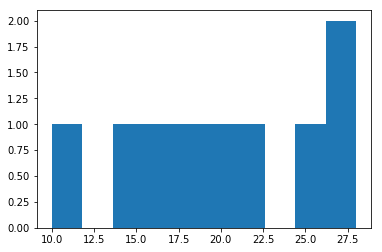

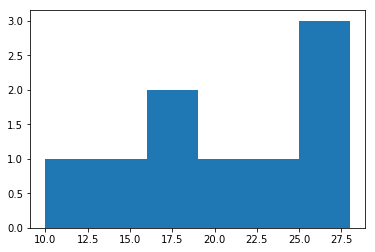

In [227]:
average_speed = [10, 20, 25, 27, 28, 22, 15, 18, 17]  
import matplotlib.pyplot as plt  
plt.hist(average_speed)  
plt.show()  
plt.hist(average_speed, bins=6)  
plt.show()  

In [229]:
# 求解分布的不对称度
from scipy.stats import skew  
speed_skew=skew(average_speed)
speed_skew

-0.2300757426675269

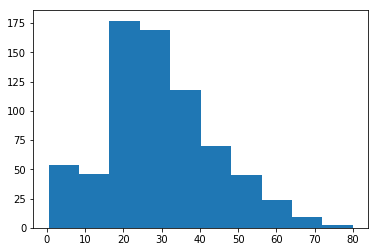

In [234]:
import pandas  
f = "titanic.csv"  
titanic_survival = pandas.read_csv(f)  
new_titanic_survival = titanic_survival.dropna(subset=["Age", "Sex"])  
import matplotlib.pyplot as plt  
import numpy  
plt.hist(new_titanic_survival['Age'])  
# plt.axvline(numpy.median(new_titanic_survival['Age']),c='b')  
# plt.axvline(new_titanic_survival['Age'].mean(),c='r')  
plt.show()

In [235]:
from scipy.stats import skew  
from scipy.stats import kurtosis  
mean_age=new_titanic_survival['Age'].mean()  
median_age=numpy.median(new_titanic_survival['Age'])  
skew_age=skew(new_titanic_survival['Age'])  
kurtosis_age=kurtosis(new_titanic_survival['Age'])  

https://blog.csdn.net/sodleave/article/details/72631006


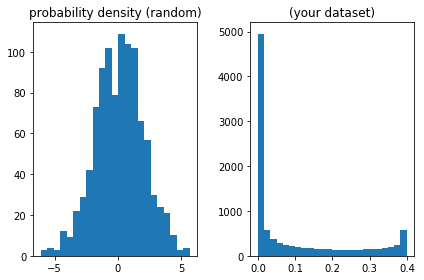

In [248]:
import numpy as np
from scipy.stats import kurtosis, skew

x_random = np.random.normal(0, 2, 1000)

x = np.linspace( -5, 5, 10000 )
y = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x)**2  )  # normal distribution

import matplotlib.pyplot as plt
%matplotlib inline

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(x_random, bins='auto')
ax1.set_title('probability density (random)')
ax2.hist(y, bins='auto')
ax2.set_title('(your dataset)')
plt.tight_layout()

In [1]:
import pandas as pd

In [2]:
name=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
cars = pd.read_table("auto-mpg.data", names=name, delim_whitespace=True)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# 可视化部分特征之间的关系

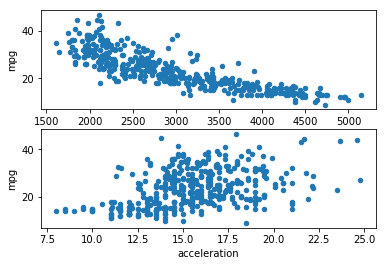

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

cars.plot.scatter(x="weight", y="mpg", ax=ax1)
cars.plot.scatter(x="acceleration", y="mpg", ax=ax2)

# 线性回归模型的训练与预测

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(cars[["weight"]], cars["mpg"])
predictions = lr.predict(cars[["weight"]])
print(predictions[:5])
print(cars["mpg"].head())

[ 19.41852276  17.96764345  19.94053224  19.96356207  19.84073631]
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


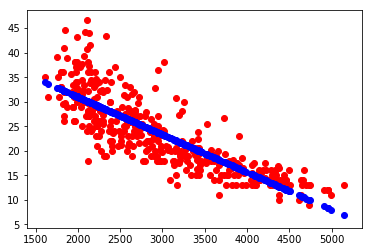

In [12]:
fig,ax = plt.subplots()
ax.scatter(cars["weight"], cars["mpg"], c="r")
ax.scatter(cars["weight"], predictions, c="b")
plt.show()

In [13]:
# 计算误差
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(cars["mpg"], predictions)
mse

18.780939734628397

In [18]:
# 进行数据清洗， 类型转换
filtered_cars = cars[cars["horsepower"] != "?"]
filtered_cars["horesepower"] = filtered_cars["horsepower"].astype(float)


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# 逻辑回归模型 对模型进行训练
# from sklearn.linear_model import LogisticRegression

# lg_model = LogisticRegression()
# lg_model.fit(admissions[["gpa"]], admissions["admit"])

# # 预测分类概率
# pre_probs = lg_model.pre_probs(admissions[["gpa"]])
# plt.scatter(admissions["gpa"], pre_probs[:,1])
# plt.show()

# # 进行预测
# fitted_labels = lg_model.predict(admissions[["gpa"]])
# print(fitted_labels)

In [21]:
# 将序列随机化，然后分配测试集和验证集
# import numpy as np  
# np.random.seed(8)  

# admissions = pd.read_csv("admissions.csv")  
# admissions["actual_label"] = admissions["admit"]

# admissions = admissions.drop("admit", axis=1)  
# new_ind=np.random.permutation(admissions.index)  #对序列进行随机化 
# shuffled_admissions=admissions.loc[new_ind] 

# train=shuffled_admissions.iloc[0:515]  
# test=shuffled_admissions.iloc[515:] 
# print(shuffled_admissions.head())  


# 模型训练和验证
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(train[["gpa"]], train["actual_label"])
# test["predicted_label"] = model.predict(test[["gpa"]])
# matches = test["predicted_label"] == test["actual_label"]

# correct_predictions = test[matches]
# accuracy = len(correct_predictions) / len(test)

# tp=len(test[(test['actual_label']==1)&(test['predicted_label']==1)])  
# tn=len(test[(test['actual_label']==0)&(test['predicted_label']==0)])  
# fp=len(test[(test['actual_label']==0)&(test['predicted_label']==1)])  
# fn=len(test[(test['actual_label']==1)&(test['predicted_label']==0)])  

# sensitivity = tp/(tp+fn)
# specificity = tn/(tn+fp)

# # 画出 Roc曲线
# from sklearn import metrics
# pred_prob = model.predict_proba(test[["gpa"]])
# fpr, tpr,thresholds = metrics.roc_curve(test["actual_label"], pred_prob[:,1])
# plt.plot(fpr, tpr)
# from sklearn.metrics import roc_auc_score
# auc_score = roc_auc_score(test["actual_label"], pred_prob[:,1])


In [23]:
# # 计算 欧式距离
# from sklearn.metrics.pairwise import euclidean_distances
# distance = euclidean_distances([votes.iloc[0,3:]], [votes.iloc[2,3:]])

# # 进行k均值聚类
# import pandas as pd
# from sklearn.cluster import KMeans
# kmeans_model = KMeans(n_clusters=2, random_state=1)
# senator_distances = kmeans_model.fit_transform(votes.iloc[:, 3:])

# # 统计频次
# labels = kmeans_model.labels_
# pd.crosstab(labels, votes["party"])

# # 找出异常的samples, 本该属于某一簇，实际没有聚类到该簇
# democratic_outliers = votes[(labels == 1) & (votes["party"] == "D")]
# print(democratic_outliers)

# # 将聚类可视化
# plt.scatter(senator_distances[:, 0], senator_distances[:,1], c=labels)
# plt.show()

# #利用各个sample到各个簇的距离值来评价各个sample的extreme情况和moderate情况，依据此进行排序  
# extremism=[senator_distances[i,0]**3+senator_distances[i,1]**3 for i in range(len(senator_distances))]  
# votes['extremism']=extremism  
# votes.sort_values('extremism',inplace=True,ascending=False)  
# print(votes.head(10))  

In [26]:
import pandas as pd
board_games = pd.read_csv("games.csv")
board_games = board_games.dropna(axis=0)
board_games = board_games[board_games["users_rated"] > 0]
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


(array([   602.,   1231.,   2824.,   5206.,   8223.,  13593.,  13849.,
          8470.,   2224.,    672.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

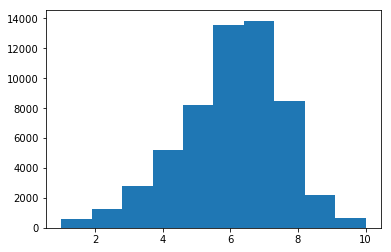

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(board_games["average_rating"])

In [28]:
print(board_games["average_rating"].std())
print(board_games["average_rating"].mean())


1.5788299348332662
6.016112849333889


In [29]:
from sklearn.cluster import KMeans

clus = KMeans(n_clusters=5)
cols = list(board_games.columns)
cols.remove("name")
cols.remove("id")
cols.remove("type")
numeric = board_games[cols]

clus.fit(numeric)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
import numpy as np
game_mean = numeric.apply(np.mean, axis=1)
game_std = numeric.apply(np.std, axis=1)


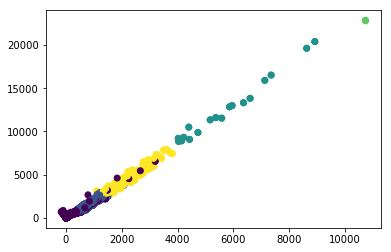

In [31]:
labels = clus.labels_
plt.scatter(x=game_mean, y=game_std, c=labels)

In [33]:
correlations = numeric.corr()
correlations["average_rating"]

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

In [34]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
cols.remove("average_rating")
cols.remove("bayes_average_rating")
reg.fit(board_games[cols], board_games["average_rating"])

predictions = reg.predict(board_games[cols])
np.mean((predictions - board_games["average_rating"]) ** 2)

2.093396975833943

In [44]:
import pandas as pd

In [49]:
cars = pd.read_csv("Auto.csv")
unique_regions = cars["origin"].unique()
unique_regions

array([1, 3, 2], dtype=int64)

In [50]:
# 独热编码
dummy_cylinders = pd.get_dummies(cars["cylinders"], prefix="cyl")
cars = pd.concat([cars, dummy_cylinders], axis=1)

dummy_years = pd.get_dummies(cars["year"], prefix="year")
cars = pd.concat([cars, dummy_years], axis=1)
cars = cars.drop(["cylinders", "year"], axis=1)
cars

,mpg,displacement,horsepower,weight,acceleration,origin,name,cyl_3,cyl_4,cyl_5,...,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,18.0,307.0,130,3504,12.0,1,chevrolet chevelle malibu,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165,3693,11.5,1,buick skylark 320,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150,3436,11.0,1,plymouth satellite,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150,3433,12.0,1,amc rebel sst,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140,3449,10.5,1,ford torino,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15.0,429.0,198,4341,10.0,1,ford galaxie 500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,14.0,454.0,220,4354,9.0,1,chevrolet impala,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,14.0,440.0,215,4312,8.5,1,plymouth fury iii,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,14.0,455.0,225,4425,10.0,1,pontiac catalina,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,15.0,390.0,190,3850,8.5,1,amc ambassador dpl,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# import numpy as np
# shuffled_rows = np.random.permutation(cars.index) #打乱编码
# shuffled_cars = cars.iloc[shuffled_rows]

# highest_train_row = int(cars.shape[0] * .7)
# train = shuffled_cars.iloc[:highest_train_row]
# test = shuffled_cars.iloc[highest_train_row:]

# # 将三分类问题转化为三个二分类问题，给出俩种解决方案

# #>>>
# from sklearn.linear_model import LogisticRegression
# unique_origins = cars["origin"].unique()
# unique_origins.sort()

# models = {}
# for i in unique_origins:
#     model = LogisticRegression()
#     train_x = train.iloc[:, 6:]
#     train_y = train[train["origin"] == i]
#     model.fit(train_x, train_y)
#     models[i] = model
    
    
# #>>>
# from sklearn.linear_model import LogisticRegression
# unique_origins = cars["origin"].unique()
# unique_origins.sort()
# models = {}
# features = [c for c in train.columns if c.startswith("cy1") or c.startswith("year")]
# for origin in unique_origins:
#     model = LogisticRegression()
#     X_train = train[features]
#     y_train = train["origin"] == origin
#     model.fit(X_train, y_train)
#     models[origin] = model
    
# # 计算各个模型对应类的概率值构成DataFrame表
# testing_probs = pd.DataFrame(columns=unique_origins)
# for i in unique_origins:
#     testing_probs[i] = models[i].predict_proba(test[features])[:, 1]
    
    
# # 根据最大概率确定分类
# predicted_origins = testing_probs.idxmax(axis=1)

In [56]:
#披萨斜塔斜度随着时间的变化  
import pandas  
import matplotlib.pyplot as plt  
pisa = pandas.DataFrame({"year": range(1975, 1988),   
                         "lean": [2.9642, 2.9644, 2.9656, 2.9667, 2.9673, 2.9688, 2.9696,   
                                  2.9698, 2.9713, 2.9717, 2.9725, 2.9742, 2.9757]})  
print(pisa) 

      lean  year
0   2.9642  1975
1   2.9644  1976
2   2.9656  1977
3   2.9667  1978
4   2.9673  1979
5   2.9688  1980
6   2.9696  1981
7   2.9698  1982
8   2.9713  1983
9   2.9717  1984
10  2.9725  1985
11  2.9742  1986
12  2.9757  1987


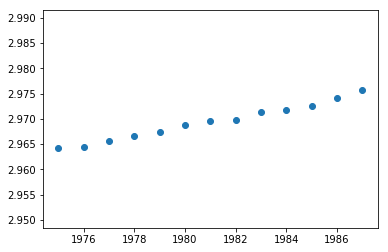

In [57]:
plt.scatter(pisa["year"], pisa["lean"])

In [58]:
import statsmodels.api as sm
y = pisa.lean
X = pisa.year

X = sm.add_constant(X)
X

F:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,const,year
0,1.0,1975
1,1.0,1976
2,1.0,1977
3,1.0,1978
4,1.0,1979
5,1.0,1980
6,1.0,1981
7,1.0,1982
8,1.0,1983
9,1.0,1984


In [60]:
# OLS -- Ordinary Least Squares Fit  
linear = sm.OLS(y, X)
linearfit = linear.fit()
print(linearfit.summary())

                            OLS Regression Results                            
Dep. Variable:                   lean   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     904.1
Date:                Sat, 05 May 2018   Prob (F-statistic):           6.50e-12
Time:                        15:57:25   Log-Likelihood:                 83.777
No. Observations:                  13   AIC:                            -163.6
Df Residuals:                      11   BIC:                            -162.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1233      0.061     18.297      0.0

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [61]:
# Our predicted values of y  
yhat = linearfit.predict(X)  
print(yhat)  
residuals=yhat-y  

0     2.963778
1     2.964710
2     2.965642
3     2.966574
4     2.967505
5     2.968437
6     2.969369
7     2.970301
8     2.971233
9     2.972165
10    2.973097
11    2.974029
12    2.974960
dtype: float64


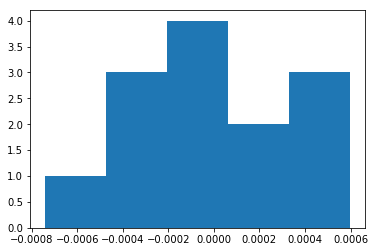

In [62]:
# The variable residuals is in memory  
plt.hist(residuals, bins=5)  
import numpy as np  
# sum the (predicted - observed) squared  
SSE = np.sum((y.values-yhat)**2)  
RSS=np.sum((y.mean()-yhat)**2)  
TSS=SSE+RSS  
  

In [63]:
print("\n",linearfit.params)  
delta = linearfit.params["year"] * 15  


 const    1.123338
year     0.000932
dtype: float64


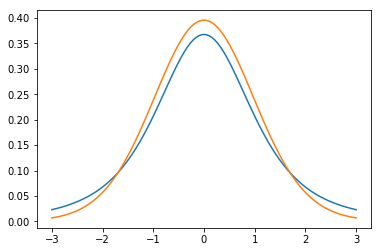

In [64]:
SSE = np.sum((y.values - yhat)**2)  
# Compute variance in X  
xvar = np.sum((pisa.year - pisa.year.mean())**2)  
# Compute variance in b1   
s2b1 = SSE / ((y.shape[0] - 2) * xvar)  
R2=RSS/TSS  

#画出T分布不同自由度曲线  
from scipy.stats import t  
# 100 values between -3 and 3  
x = np.linspace(-3,3,100)  
tdist3=t.pdf(x=x, df=3)  
tdist30=t.pdf(x=x, df=30)  
plt.plot(x,tdist3)  
plt.plot(x,tdist30)  
plt.show()  

In [65]:
tstat = linearfit.params["year"] / np.sqrt(s2b1)  
# At the 95% confidence interval for a two-sided t-test we must use a p-value of 0.975  
pval = 0.975  
# The degrees of freedom  
df = pisa.shape[0] - 2  
# The probability to test against  
p = t.cdf(tstat, df=df)  
beta1_test = p > pval  

In [66]:
# Our implementation for train_and_test, takes in a list of strings.  
def train_and_test(cols):  
    # Split into features & target.  
    features = filtered_cars[cols]  
    target = filtered_cars["mpg"]  
    # Fit model.  
    lr = LinearRegression()  
    lr.fit(features, target)  
    # Make predictions on training set.  
    predictions = lr.predict(features)  
    # Compute MSE and Variance.  
    mse = mean_squared_error(filtered_cars["mpg"], predictions)  
    variance = np.var(predictions)  
    return(mse, variance)  

one_mse, one_var = train_and_test(["cylinders"])  
two_mse, two_var = train_and_test(['cylinders', 'displacement'])  
three_mse, three_var = train_and_test(['cylinders', 'displacement', 'horsepower'])  
four_mse, four_var = train_and_test(['cylinders', 'displacement', 'horsepower', 'weight'])  
five_mse, five_var = train_and_test(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'])  
six_mse, six_var = train_and_test(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year'])  
seven_mse, seven_var = train_and_test(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'])  


#进行k折线交叉验证  
from sklearn.cross_validation import KFold  
from sklearn.metrics import mean_squared_error  
import numpy as np  

def train_and_cross_val(cols):  
    features = filtered_cars[cols]  
    target = filtered_cars["mpg"]  
    variance_values = []  
    mse_values = []  
    # KFold instance.  
    kf = KFold(n=len(filtered_cars), n_folds=10, shuffle=True, random_state=3)   
    # Iterate through over each fold.  
    for train_index, test_index in kf:  
        # Training and test sets.  
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]  
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]      
        # Fit the model and make predictions.  
        lr = LinearRegression()  
        lr.fit(X_train, y_train)  
        predictions = lr.predict(X_test)       
        # Calculate mse and variance values for this fold.  
        mse = mean_squared_error(y_test, predictions)  
        var = np.var(predictions)  
        # Append to arrays to do calculate overall average mse and variance values.  
        variance_values.append(var)  
        mse_values.append(mse)  
    # Compute average mse and variance values.  
    avg_mse = np.mean(mse_values)  
    avg_var = np.mean(variance_values)  
    return(avg_mse, avg_var)  

two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])  
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])  
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])  
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])  
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])  
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"]) 

F:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


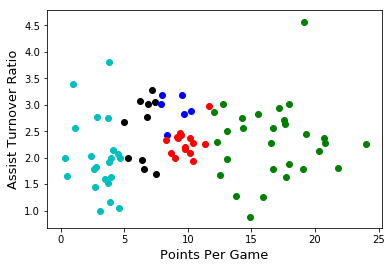

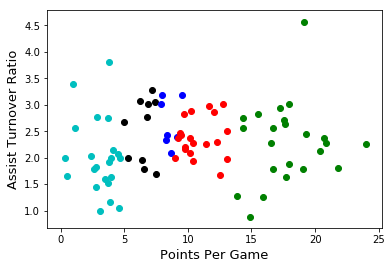

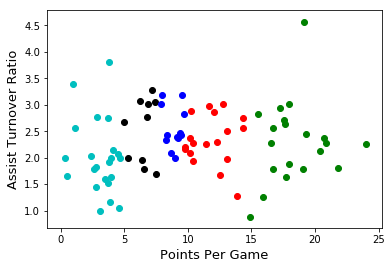

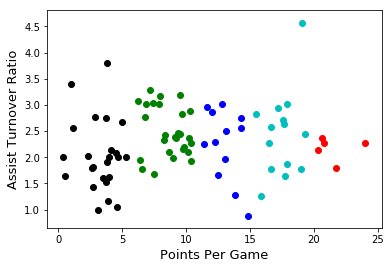

In [73]:
import pandas as pd  
import numpy as np  
nba = pd.read_csv("nba_2013.csv")  
point_guards=nba[nba['pos']=='PG']  
point_guards['ppg'] = point_guards['pts'] / point_guards['g']  
point_guards = point_guards[point_guards['tov'] != 0]  
point_guards['atr']=point_guards['ast']/point_guards['tov']  


num_clusters = 5
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)
# use the random indices to create the centroids
centroids = point_guards.loc[random_initial_points]

#5个中心点构成的字典  
def centroids_to_dict(centroids):  
    dictionary = dict()  
    # iterating counter we use to generate a cluster_id  
    counter = 0  
    # iterate a pandas data frame row-wise using .iterrows()  
    for index, row in centroids.iterrows():  
        coordinates = [row['ppg'], row['atr']]  
        dictionary[counter] = coordinates  
        counter += 1  
    return dictionary  
centroids_dict = centroids_to_dict(centroids)  


#计算欧几里得距离  
import math  
def calculate_distance(centroid, player_values):  
    root_distance = 0  
    for x in range(0, len(centroid)):  
        difference = centroid[x] - player_values[x]  
        squared_difference = difference**2  
        root_distance += squared_difference  
    euclid_distance = math.sqrt(root_distance)  
    return euclid_distance  

#给各个点进行标记  
def assign_to_cluster(s):  
    s_p=s.loc[['ppg','atr']]  
    min_dis=None  
    min_id=0  
    for k,v in centroids_dict.items():  
        k_dis=calculate_distance(v,s_p)  
        if min_dis==None or min_dis>k_dis:  
            min_dis=k_dis  
            min_id=k  
    return min_id  
point_guards['cluster']=point_guards.apply(assign_to_cluster,axis=1)  


#可视化  
def visualize_clusters(df, num_clusters):  
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  
    for n in range(num_clusters):  
        clustered_df = df[df['cluster'] == n]  
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])  
        plt.xlabel('Points Per Game', fontsize=13)  
        plt.ylabel('Assist Turnover Ratio', fontsize=13)  
    plt.show()  
    
visualize_clusters(point_guards, 5)  


#继续迭代，更新各个簇的中心点，采用统计平均  
def recalculate_centroids(df):  
    new_centroids_dict = dict()  
    # 0..1...2...3...4  
    for cluster_id in range(0, num_clusters):  
        # Finish the logic  
        cluster_df=df[df['cluster']==cluster_id]  
        new_centroids_dict[cluster_id]=(cluster_df['ppg'].mean(),cluster_df['atr'].mean())  
    return new_centroids_dict  
centroids_dict = recalculate_centroids(point_guards)  


#继续可视化和迭代  
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)  
visualize_clusters(point_guards, num_clusters)  
centroids_dict = recalculate_centroids(point_guards)  
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)  
visualize_clusters(point_guards, num_clusters)  
  
    
#采用sklearn聚类的方式  
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=num_clusters)  
kmeans.fit(point_guards[['ppg', 'atr']])  
point_guards['cluster'] = kmeans.labels_  
visualize_clusters(point_guards, num_clusters)  

## 梯度下降法，针对线性回归

   distance  accuracy
0  0.314379 -0.707727
1  1.693777 -1.586669
2 -0.059695 -0.176699
3 -0.574047  0.372640
4  1.343083 -1.934584


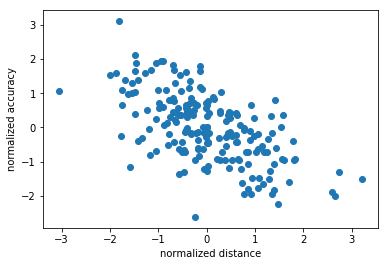

In [80]:
import pandas  
import matplotlib.pyplot as plt  
pga = pandas.read_csv("pga.csv")
pga.distance = (pga.distance - pga.distance.mean()) / pga.distance.std()  
pga.accuracy = (pga.accuracy - pga.accuracy.mean()) / pga.accuracy.std()  
print(pga.head())  
plt.scatter(pga.distance, pga.accuracy)  
plt.xlabel('normalized distance')  
plt.ylabel('normalized accuracy')  
plt.show()  

In [81]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(pga[["distance"]], pga["accuracy"])
thetal = model.coef_

In [82]:
#损失函数  
def cost(theta0, theta1, x, y):  
    # Initialize cost  
    J = 0  
    # The number of observations  
    m = len(x)  
    # Loop through each observation  
    for i in range(m):  
        # Compute the hypothesis   
        h = theta1 * x[i] + theta0  
        # Add to cost  
        J += (h - y[i])**2  
    # Average and normalize cost  
    J /= (2*m)  
    return J  

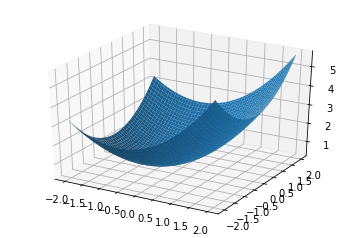

In [85]:
#画出三维图  
from mpl_toolkits.mplot3d import Axes3D
theta0s = np.linspace(-2,2,100)  
theta1s = np.linspace(-2,2, 100)  
COST = np.empty(shape=(100,100))  
T0S, T1S = np.meshgrid(theta0s, theta1s)  
for i in range(100):  
    for j in range(100):  
        COST[i,j] = cost(T0S[0,i], T1S[j,0], pga.distance, pga.accuracy)  
fig2 = plt.figure()  
ax = fig2.gca(projection='3d')  
ax.plot_surface(X=T0S,Y=T1S,Z=COST)  
plt.show()  

In [86]:
#求斜率和截距的偏导数  
def partial_cost_theta1(theta0, theta1, x, y):  
    # Hypothesis  
    h = theta0 + theta1*x  
    # Hypothesis minus observed times x  
    diff = (h - y) * x  
    # Average to compute partial derivative  
    partial = diff.sum() / (x.shape[0])  
    return partial  
  
def partial_cost_theta0(theta0, theta1, x, y):  
    # Hypothesis  
    h = theta0 + theta1*x  
    # Difference between hypothesis and observation  
    diff = (h - y)  
    # Compute partial derivative  
    partial = diff.sum() / (x.shape[0])  
    return partial  
  

Theta1 = -0.6046983166379609


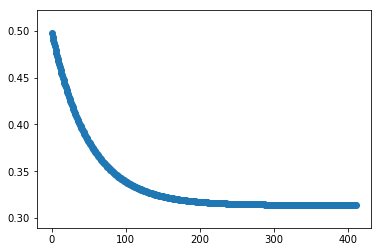

In [87]:
#梯度下降算法  
# x is our feature vector -- distance  
# y is our target variable -- accuracy  
# alpha is the learning rate  
# theta0 is the intial theta0   
# theta1 is the intial theta1  
def gradient_descent(x, y, alpha=0.1, theta0=0, theta1=0):  
    max_epochs = 1000 # Maximum number of iterations  
    counter = 0      # Intialize a counter  
    c = cost(theta1, theta0, pga.distance, pga.accuracy)  ## Initial cost  
    costs = [c]     # Lets store each update  
    # Set a convergence threshold to find where the cost function in minimized  
    # When the difference between the previous cost and current cost   
    #        is less than this value we will say the parameters converged  
    convergence_thres = 0.000001    
    cprev = c + 10     
    theta0s = [theta0]  
    theta1s = [theta1]  
    # When the costs converge or we hit a large number of iterations will we stop updating  
    while (np.abs(cprev - c) > convergence_thres) and (counter < max_epochs):  
        cprev = c  
        # Alpha times the partial deriviative is our updated  
        update0 = alpha * partial_cost_theta0(theta0, theta1, x, y)  
        update1 = alpha * partial_cost_theta1(theta0, theta1, x, y)  
        # Update theta0 and theta1 at the same time  
        # We want to compute the slopes at the same set of hypothesised parameters  
        #             so we update after finding the partial derivatives  
        theta0 -= update0  
        theta1 -= update1  
        # Store thetas  
        theta0s.append(theta0)  
        theta1s.append(theta1)  
        # Compute the new cost  
        c = cost(theta0, theta1, pga.distance, pga.accuracy)  
        # Store updates  
        costs.append(c)  
        counter += 1   # Count  
    return {'theta0': theta0, 'theta1': theta1, "costs": costs}  
  
print("Theta1 =", gradient_descent(pga.distance, pga.accuracy)['theta1'])  
descend = gradient_descent(pga.distance, pga.accuracy, alpha=.01)  
plt.scatter(range(len(descend["costs"])), descend["costs"])  
plt.show()  

## 决策树

In [89]:
# #调用sklearn库训练决策树  
# from sklearn.tree import DecisionTreeClassifier  
# columns = ["age", "workclass", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "hours_per_week", "native_country"]  
# # Set random_state to 1 to make sure the results are consistent  
# clf = DecisionTreeClassifier(random_state=1)  
# clf.fit(income[columns],income['high_income'])  
  
# #划分训练集80% 测试集20%  
# import numpy  
# import math  
# numpy.random.seed(1)  
# income = income.reindex(numpy.random.permutation(income.index))  
# train_max_row = math.floor(income.shape[0] * .8)  
# train=income.iloc[:train_max_row]  
# test=income.iloc[train_max_row:]  
  
# #计算auc  
# from sklearn.metrics import roc_auc_score  
# clf = DecisionTreeClassifier(random_state=1)  
# clf.fit(train[columns], train["high_income"])  
# predictions = clf.predict(test[columns])  
# error=roc_auc_score(test['high_income'],predictions)  
  
# #调整模型参数，防止过拟合  
# clf = DecisionTreeClassifier(random_state=1,min_samples_split=13,max_depth=7)  
# clf.fit(train[columns], train["high_income"])  
# predictions = clf.predict(test[columns])  
# test_auc = roc_auc_score(test["high_income"], predictions)  
# #通过训练集和测试集的auc来看模型的拟合情况，从而调整模型参数  

In [91]:
# #用sklearn库构造随机森林  
# from sklearn.ensemble import RandomForestClassifier  
# clf = RandomForestClassifier(n_estimators=5, random_state=1, min_samples_leaf=2)  
# clf.fit(train[columns],train['high_income'])  
# pre=clf.predict(test[columns])  
# auc=roc_auc_score(test['high_income'],pre)  

In [92]:
# #数据预处理  
# import pandas as pd  
# loans_2007 = pd.read_csv('LoanStats3a.csv', skiprows=1) #忽略第一行  
# half_count = len(loans_2007) / 2  
# loans_2007 = loans_2007.dropna(thresh=half_count, axis=1)#删除有50%的值为空的列  
# loans_2007 = loans_2007.drop(['desc', 'url'],axis=1)  
# loans_2007.to_csv('loans_2007.csv', index=False)  
  
# loans_2007 = pd.read_csv("loans_2007.csv")  
# loans_2007.drop_duplicates()  
# print(loans_2007.iloc[0])  
# print(loans_2007.shape[1])  
  
# #排除一些有信息泄露的数据，冗余数据，或者需要其他数据才能变成有用特征的数据  
# drop_cols=["id", "member_id", "funded_amnt", "funded_amnt_inv", "grade", "sub_grade", "emp_title", "issue_d"]  
# loans_2007=loans_2007.drop(drop_cols,axis=1)  
# loans_2007 = loans_2007.drop(["zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv", "total_rec_prncp"], axis=1)  
# loans_2007 = loans_2007.drop(["total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis=1)  
  
# #构造label，排除一些不明确rows，将label映射为正类和负类  
# loans_2007=loans_2007[(loans_2007['loan_status']=='Fully Paid')|(loans_2007['loan_status']=='Charged Off')]  
# re={'loan_status':{'Fully Paid':1,'Charged Off':0}}  
# loans_2007=loans_2007.replace(re)  
  
# #排除单值列：每一列排除空值后如果只有一个有效值，则将其删除  
# drop_columns=[]  
# for col in loans_2007.columns.tolist():  
#     uni_value=loans_2007[col].dropna().unique()  
#     if len(uni_value)==1:  
#         drop_columns.append(col)  
# loans_2007=loans_2007.drop(drop_columns,axis=1)  

In [93]:
# #读入数据，统计每一列空值Nan的个数  
# import pandas as pd  
# loans = pd.read_csv('filtered_loans_2007.csv')  
# null_counts = loans.isnull().sum()  
# print(null_counts)  
# #output：  
# #title                    10  
# #revol_util               50  
# #last_credit_pull_d        2  
# #pub_rec_bankruptcies    697  

In [94]:
# #移除含有空值的行，以及空值较多的列  
# loans=loans.drop('pub_rec_bankruptcies',axis=1)  
# loans=loans.dropna(axis=0)  
# print(loans.dtypes.value_counts())  
# #output：  
# #object     11  
# #float64    10  
# #int64       1  

In [95]:
# #选出并查看object类型的列  
# object_columns_df=loans.select_dtypes(include=['object'])  
# print(object_columns_df.iloc[0])  

In [97]:
# #探索category数值的列  
# cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']  
# for c in cols:  
#     print(loans[c].value_counts())  
  
# mapping_dict = {  
#     "emp_length": {  
#         "10+ years": 10,  
#         "9 years": 9,  
#         "8 years": 8,  
#         "7 years": 7,  
#         "6 years": 6,  
#         "5 years": 5,  
#         "4 years": 4,  
#         "3 years": 3,  
#         "2 years": 2,  
#         "1 year": 1,  
#         "< 1 year": 0,  
#         "n/a": 0  
#     }  
# }  

# loans=loans.drop(['last_credit_pull_d', 'addr_state', 'title', 'earliest_cr_line'],axis=1)  
# loans['int_rate']=loans['int_rate'].str.rstrip('%').astype('float64')  
# loans['revol_util']=loans['revol_util'].str.rstrip('%').astype('float64')  
# loans=loans.replace(mapping_dict)  


# cat_columns = ["home_ownership", "verification_status", "emp_length", "purpose", "term"]  
# dummy_df = pd.get_dummies(loans[cat_columns])  
# loans = pd.concat([loans, dummy_df], axis=1)  
# loans = loans.drop(cat_columns, axis=1) 

In [ ]:
# import pandas as pd  
# loans=pd.read_csv('cleaned_loans_2007.csv')  
# print(loans.info())  
  
# #计算TP,TN,FP,FN  
# import pandas as pd  
# tn=sum((predictions==0)&(loans['loan_status']==0))  
# tp=sum((predictions==1)&(loans['loan_status']==1))  
# fn=sum((predictions==0)&(loans['loan_status']==1))  
# fp=sum((predictions==1)&(loans['loan_status']==0))  
  
# #根据样本的分布和实际场景选择评价指标  
# # Predict that all loans will be paid off on time.  
# predictions = pd.Series(numpy.ones(loans.shape[0]))  
# fp=sum((predictions==1)&(loans['loan_status']==0))  
# tp=sum((predictions==1)&(loans['loan_status']==1))  
# fn=sum((predictions==0)&(loans['loan_status']==1))  
# tn=sum((predictions==0)&(loans['loan_status']==0))  
# fpr=fp/(fp+tn)  
# tpr=tp/(tp+fn)  
# print(fpr,tpr)  
  
# from sklearn.linear_model import LogisticRegression  
# features=loans.drop('loan_status',axis=1)  
# target=loans['loan_status']  
# lr = LogisticRegression()  
# lr.fit(features,target)  
# predictions=lr.predict(features)  
  
# #交叉验证  
# from sklearn.linear_model import LogisticRegression  
# from sklearn.cross_validation import cross_val_predict, KFold  
# lr = LogisticRegression()  
# kf = KFold(features.shape[0], random_state=1)  
# predictions=cross_val_predict(lr,features,target,cv=kf)  
# tp=sum((predictions==1)&(target==1))  
# tn=sum((predictions==0)&(target==0))  
# fp=sum((predictions==1)&(target==0))  
# fn=sum((predictions==0)&(target==1))  
# tpr=tp/(tp+fn)  
# fpr=fp/(fp+tn)  
# print(fpr,tpr)  
  
# #调整参数克服样本不均匀，增加负样本错误的惩罚  
# from sklearn.linear_model import LogisticRegression  
# from sklearn.cross_validation import cross_val_predict  
# lr=LogisticRegression(class_weight='balanced')  
# kf=KFold(features.shape[0],random_state=1)  
# predictions=cross_val_predict(lr,features,target,cv=kf)  
# tp=sum((predictions==1)&(target==1))  
# tn=sum((predictions==0)&(target==0))  
# fp=sum((predictions==1)&(target==0))  
# fn=sum((predictions==0)&(target==1))  
# tpr=tp/(tp+fn)  
# fpr=fp/(fp+tn)  
# print(fpr,tpr)